In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [13]:
import statsmodels.api as sm

In [14]:
index=pd.date_range(start='2018-01-01',end='2020-12-31')

In [15]:
index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=1096, freq='D')

In [16]:
import ffn

In [17]:
np.random.randn(1096)

array([-0.63830662,  0.15596197,  2.56654982, ...,  0.07819394,
       -0.60527383, -0.73749521])

In [18]:
# construct a white noise
# white noise
# mean=0, variance=sigma^2
mu = 0
sigma = 1
# set random seed
#np.random.seed(1234)
wn = mu + sigma*np.random.randn(1096)

In [19]:
z=pd.DataFrame(wn,index=pd.date_range(start='2018-01-01',end='2020-12-31',name='date'),columns=['wn'])

In [20]:
# construct a white noise
# white noise
# mean=0, variance=sigma^2
mu = 0
sigma = 1
# set random seed
#np.random.seed(1234)
wn = mu + sigma*np.random.randn(100)

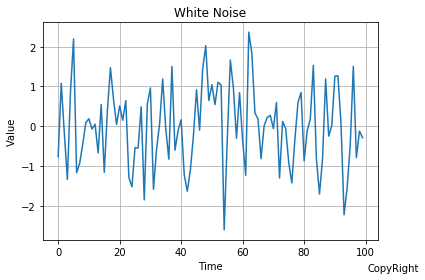

In [21]:
plt.plot(wn)
plt.title('White Noise')
plt.xlabel('Time')
plt.ylabel('Value')
plt.figtext(0.995, 0.01, 'CopyRight', ha='right', va='bottom')
plt.grid('True')

In [22]:
# import data from yahoo finance
data = ffn.get('^gspc',start='2020-01-01')

In [23]:
(data.gspc.shift()-data.gspc.mean())

Date
2019-12-31           NaN
2020-01-02   -100.872724
2020-01-03    -73.802655
2020-01-06    -96.802655
2020-01-07    -85.372724
                 ...    
2021-03-17    631.057208
2021-03-18    642.467364
2021-03-19    583.807208
2021-03-22    581.447345
2021-03-23    608.937335
Name: gspc, Length: 309, dtype: float64

In [24]:
(data.gspc-data.gspc.mean())

Date
2019-12-31   -100.872724
2020-01-02    -73.802655
2020-01-03    -96.802655
2020-01-06    -85.372724
2020-01-07    -94.472821
                 ...    
2021-03-17    642.467364
2021-03-18    583.807208
2021-03-19    581.447345
2021-03-22    608.937335
2021-03-23    578.867267
Name: gspc, Length: 309, dtype: float64

In [25]:
np.sum((data.gspc-data.gspc.mean())**2)


44397904.98424241

In [26]:
# 一階自我相關係數
# cov(y_{t-1},y_t)/var(y_t)
cov = np.sum((data.gspc-data.gspc.mean())*(data.gspc.shift()-data.gspc.mean()))
var_1 = np.sum((data.gspc-data.gspc.mean())**2)
var_2 = np.sum((data.gspc.shift()-data.gspc.shift().mean())**2)
ar_1 = cov/(np.sqrt(var_1)*np.sqrt(var_2))
print(ar_1)

0.9883216684411759


In [60]:
print(data.gspc.var())
v_1 = np.sum((data.gspc - data.gspc.mean())**2)/(len(data.gspc)-1)
print(v_1)

136964.22547289604
136964.225472896


In [70]:
# correlation 
data.gspc.corr(data.gspc.shift())

0.9875562625490979

In [81]:
# import exchange rate (TWD/USD)
twdusd = ffn.get('TWD=X',start='2019-01-01')
twdusd.head()

,twdx
Date,
2018-12-31,30.552999
2019-01-01,30.565001
2019-01-02,30.500999
2019-01-03,30.759001
2019-01-04,30.863001


In [82]:
# calculate the first-order autocorrelation
twdusd.twdx.corr(twdusd.twdx.shift())

0.9957863613822104

In [83]:
# construct the time trend variable
twdusd['t_trend'] = range(len(twdusd.twdx))
twdusd.head()

,twdx,t_trend
Date,,
2018-12-31,30.552999,0
2019-01-01,30.565001,1
2019-01-02,30.500999,2
2019-01-03,30.759001,3
2019-01-04,30.863001,4


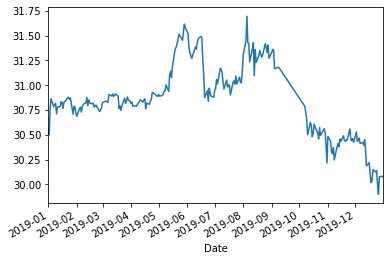

In [89]:
# 時間條件式搜索
twdusd['2019'].twdx.plot()

In [98]:
# 一般條件式搜索
test = twdusd[twdusd.twdx<30].twdx
test

Date
2019-12-26    29.900000
2020-01-01    29.898001
2020-01-02    29.844000
2020-01-03    29.900000
2020-01-08    29.985001
2020-01-10    29.943001
2020-01-13    29.962000
2020-01-14    29.874001
2020-01-15    29.826000
2020-01-16    29.933001
2020-01-17    29.899000
2020-01-20    29.950001
2020-01-21    29.891001
2020-01-23    29.919001
2020-01-24    29.975000
2020-02-06    29.951000
2020-02-12    29.948999
2020-02-13    29.910000
2020-02-14    29.985001
2020-03-03    29.805000
2020-03-04    29.770000
2020-03-05    29.750000
2020-03-06    29.884001
2020-03-09    29.900999
2020-03-10    29.985001
2020-03-11    29.740000
2020-03-13    29.948000
2020-04-13    29.850000
2020-04-15    29.905001
2020-04-16    29.937000
                ...    
2021-01-29    27.932600
2021-02-01    28.000999
2021-02-02    27.950300
2021-02-03    27.858000
2021-02-04    27.864000
2021-02-05    27.902901
2021-02-08    27.973600
2021-02-09    27.880899
2021-02-10    27.853901
2021-02-11    27.961300
2021-02-12 

In [87]:
x = sm.add_constant(twdusd['t_trend'])
result = sm.OLS(twdusd.twdx,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   twdx   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     3532.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):          8.21e-242
Time:                        09:12:20   Log-Likelihood:                -260.36
No. Observations:                 553   AIC:                             524.7
Df Residuals:                     551   BIC:                             533.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6011      0.033    958.519      0.0

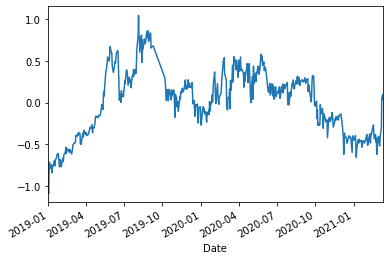

In [100]:
result.resid.plot()

In [109]:
twdusd['q_dum_1'] = 0
twdusd['q_dum_2'] = 0
twdusd['q_dum_3'] = 0

In [113]:
# 季節性dummy
twdusd.q_dum_1[twdusd.index.quarter == 1] = 1
twdusd['q_dum_2'][twdusd.index.quarter == 2] = 1
twdusd['q_dum_3'][twdusd.index.quarter == 3] = 1

C:\Users\queti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [122]:
x = sm.add_constant(twdusd[['q_dum_1','q_dum_2','q_dum_3']])
y = twdusd.twdx
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   twdx   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     28.11
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           6.42e-17
Time:                        09:29:58   Log-Likelihood:                -774.67
No. Observations:                 553   AIC:                             1557.
Df Residuals:                     549   BIC:                             1575.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.3880      0.088    334.683      0.0

In [131]:
result.resid

Date
2018-12-31    1.165011
2019-01-01    0.826663
2019-01-02    0.762662
2019-01-03    1.020664
2019-01-04    1.124664
2019-01-07    1.044664
2019-01-08    1.064662
2019-01-09    1.077663
2019-01-10    0.972663
2019-01-11    1.040662
2019-01-14    1.047662
2019-01-15    1.095663
2019-01-16    1.089662
2019-01-17    1.026662
2019-01-18    1.088663
2019-01-21    1.114664
2019-01-22    1.137662
2019-01-23    1.138664
2019-01-24    1.119663
2019-01-25    1.135663
2019-01-28    0.969663
2019-01-29    1.049663
2019-01-30    1.042663
2019-01-31    0.984662
2019-02-01    0.947664
2019-02-04    1.024663
2019-02-05    1.038663
2019-02-06    0.990663
2019-02-07    1.048664
2019-02-08    1.069663
                ...   
2021-01-29   -1.805737
2021-02-01   -1.737338
2021-02-02   -1.788037
2021-02-03   -1.880337
2021-02-04   -1.874337
2021-02-05   -1.835436
2021-02-08   -1.764737
2021-02-09   -1.857438
2021-02-10   -1.884436
2021-02-11   -1.777037
2021-02-12   -1.795237
2021-02-15   -1.723338
2021-0

In [ ]:
twdusd.

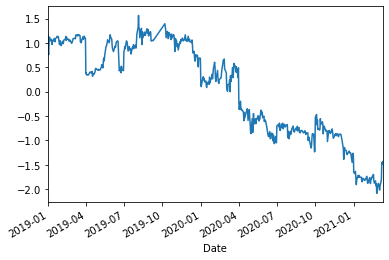

In [130]:
adj_y.plot()

In [134]:
# 原始值
y
# 配適值
result.fittedvalues
# 殘差值
result.resid


Date
2018-12-31    1.165011
2019-01-01    0.826663
2019-01-02    0.762662
2019-01-03    1.020664
2019-01-04    1.124664
2019-01-07    1.044664
2019-01-08    1.064662
2019-01-09    1.077663
2019-01-10    0.972663
2019-01-11    1.040662
2019-01-14    1.047662
2019-01-15    1.095663
2019-01-16    1.089662
2019-01-17    1.026662
2019-01-18    1.088663
2019-01-21    1.114664
2019-01-22    1.137662
2019-01-23    1.138664
2019-01-24    1.119663
2019-01-25    1.135663
2019-01-28    0.969663
2019-01-29    1.049663
2019-01-30    1.042663
2019-01-31    0.984662
2019-02-01    0.947664
2019-02-04    1.024663
2019-02-05    1.038663
2019-02-06    0.990663
2019-02-07    1.048664
2019-02-08    1.069663
                ...   
2021-01-29   -1.805737
2021-02-01   -1.737338
2021-02-02   -1.788037
2021-02-03   -1.880337
2021-02-04   -1.874337
2021-02-05   -1.835436
2021-02-08   -1.764737
2021-02-09   -1.857438
2021-02-10   -1.884436
2021-02-11   -1.777037
2021-02-12   -1.795237
2021-02-15   -1.723338
2021-0